# Welcome to lab_kmeans! 🌎

In this lab, you will continue your exploration of machine learning by doing some KMeans clustering! 

A few tips to remember:

- **You are not alone on your journey in learning programming!** You have your lab Teaching Assistant, your Course Aides, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help! When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same ***ah-hah*** moment!
- We are here to help you! Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [95]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Kim"
ca1_name = "Jessica"
ca2_name = "Sony"


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# Question of the Day (QOTD) to Ask Your Group: "What's your favorite movie?"
partner1_name = "Aamir"
partner1_netid = "aabjani2"
partner1_fav_movie = "The lightning Thief"

partner2_name = "Brianna"
partner2_netid = "bfons2"
partner2_fav_movie = "As Above So Below"

partner3_name = "Brian"
partner3_netid = "bzilles"
partner3_fav_movie = "How to train your dragon"

<hr style="color: #DD3403;">

# Part 1: The World Happiness Dataset
Every year, the UN Sustainable Development Solutions Network (SDSN) creates a **report** detailing the "happiness" of various countries in the world. Utilizing economic, social, and health data, they create the [World Happiness Report](https://worldhappiness.report/about/). Curators of the report **observed survey data** of seven variables (GDP Per Capita, Social Support, Life Expectancy, Freedom, Generosity, Corruption, and Dystopia), estimating their **associations with life** evaluations, ultimately coming up with a `Happiness Score` for each country.  

Some of their report uses data that we can analyze for this lab. We've collected a version of the 2023 **World Happiness** into a dataset and provided it in **CSV format** - it's the `happiness-report-2023.csv` file! 

## Puzzle 1.1: Loading In

Load the **World Happiness Dataset** from `happiness-report-2023.csv` and store it in the DataFrame `df`:

In [96]:
import pandas as pd
df = pd.read_csv("happiness-report-2023.csv")
df

,Country,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,2.110
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,1.162
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,0.905
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,1.221
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,-0.110


### 🔬 Test Case Checkpoint 🔬

In [97]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert('df' in vars()), "The DataFrame should be loaded in as a variable named `df`."
assert(len(df) == 137), "This is not the dataset we are looking for..."
assert('Happiness Score' in df), "This is not the dataset we are looking for..."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.2: Correlation Coefficients
Let's explore a bit about our dataset. It's always good practice to explore and understand your data before performing any machine learning task. Generate the **correlation coefficient matrix** of our **World Happiness Dataset**, `df` in the cell below:

In [98]:
df.corr()

C:\Users\Andres Gomez\AppData\Local\Temp\ipykernel_13688\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
Happiness Score,1.000000,0.784367,0.834532,0.746928,0.662924,0.044082,-0.471911,0.494452
GDP Per Capita,0.784367,1.000000,0.738069,0.837533,0.451439,-0.156456,-0.436961,-0.044568
Social Support,0.834532,0.738069,1.000000,0.725524,0.541630,0.036574,-0.272490,0.148731
Healthy Life Expectancy,0.746928,0.837533,0.725524,1.000000,0.415092,-0.135036,-0.404396,-0.014420
Freedom,0.662924,0.451439,0.541630,0.415092,1.000000,0.170229,-0.383786,0.211993
Generosity,0.044082,-0.156456,0.036574,-0.135036,0.170229,1.000000,-0.122653,0.016380
Corruption,-0.471911,-0.436961,-0.272490,-0.404396,-0.383786,-0.122653,1.000000,-0.004467
Dystopia,0.494452,-0.044568,0.148731,-0.014420,0.211993,0.016380,-0.004467,1.000000


### Group Analysis: Correlations

In the correlation coefficient matrix, the largest value not on the main diagonal was `0.837533` and the lowest was `-0.471911`.

**Q1: What does this tell you about the linear correlation of our dataset?**

*(✏️ This means that there are different variable that have a stronger correlation with Happiness Score than others. ✏️)*

**Q2: Which two columns were the most highly correlated, producing a coefficient of `0.837533`? Given the real-life context, does this make sense? Why or why not?**

*(✏️ Social support and happiness score. This makes sense given that social support has almost always shown an effect in happiness. ✏️)*

**Q3: All of the columns in our dataset show significant correlation with `Happiness Score` except for `Generosity` (with a coefficient of `0.044082`).This means there is almost no relationship between the percieved `Generosity` of a country and it's `Happiness Score`. How you make sense of this?**

*(✏️ I think that Generosity might not have an strong relationship with happiness possibly because of the greater effect external and internal negativity is  ✏️)*

## Puzzle 1.3: Visualization
Now, let's visualize the relationships between some variables in our dataset. 

Using `df.plot.scatter()`, generate a scatterplot showing the relationship between `GDP Per Capita` and `Healthy Life Expectancy`. Remember to specify these columns as the **x** and **y** of the scatterplot.


<Axes: xlabel='GDP Per Capita', ylabel='Healthy Life Expectancy'>

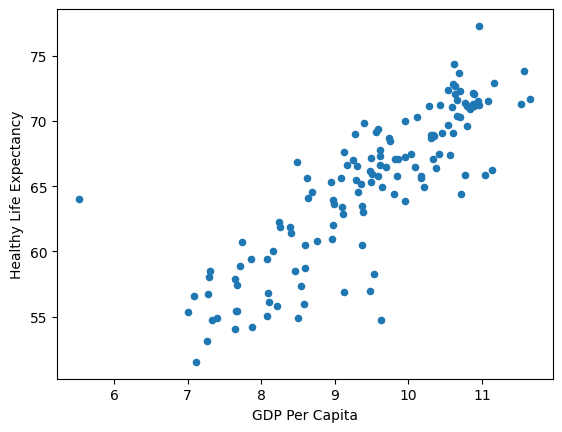

In [99]:
df.plot.scatter( "GDP Per Capita", "Healthy Life Expectancy")

**Q4: Observing the plot above, how would you divide the data into two groups (clusters)?**

*(✏️ I would group one cluster in the left bottom half and another in the right upper half  ✏️)*

Now, generate a scatterplot showing the relationship between `Happiness Score` and `Generosity`:

<Axes: xlabel='Happiness Score', ylabel='Generosity'>

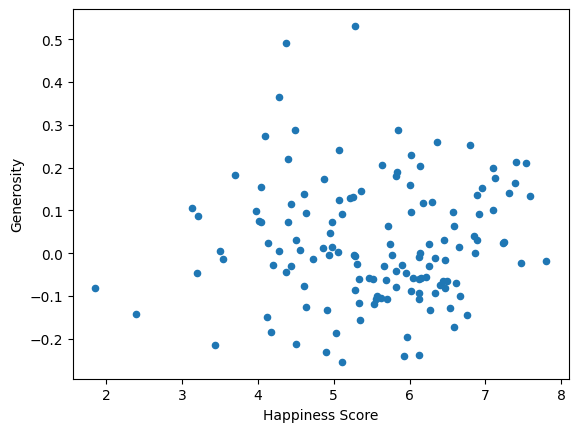

In [100]:
df.plot.scatter("Happiness Score", "Generosity")

**Q5: Observing the plot above, how would you divide the data into two groups (clusters)?**

*(✏️ I would divide it by having one group in the right half and another in the left half ✏️)*

<hr style="color: #DD3403;">

# Part 2: Clustering
Now that we've observed some relationships in our dataset, it's time to try **clustering the data**! You may have noticed that our dataset contains fairly high **correlation coefficients** across **multiple columns**. Despite this, it will still be **valuable** to perform **KMeans clustering**. 

With a **KMeans clustering** model, we will be able to both:
- Identify potential relationships between **non-linear** variables, and
- Identify the **most important *features*** of our dataset by looking at **cluster centroids**

Before we begin, remember that KMeans clustering is a method of **unsupervised** machine learning, meaning unlike `lab_regression`, we **do not provide** **labels** or target values. Rather, we will **allow the model** to determine **groups of the data** based on their similarity alone. 

## Part 2.1: Creating a KMeans Model

In the cell below, create a new KMeans model named `kmeans` that contains just **two (2) clusters**:


In [101]:
# Import the KMeans library:
from sklearn.cluster import KMeans

# Create a KMeans model:
kmeans = KMeans(n_clusters=2)

## Part 2.2: Fitting Numeric Columns to the Model
The KMeans model only works on **numeric data** (*you can't find a mean -- or average -- of non-numbers*). The following code provides a list of all the **numeric columns** in our `df`. We've provided you with the cell below to define and store the `numeric_columns` list.

*Do not modify the cell below - just **run it!***

In [102]:
numeric_columns = ['Happiness Score', 'GDP Per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity', 'Corruption','Dystopia']
numeric_columns

['Happiness Score',
 'GDP Per Capita',
 'Social Support',
 'Healthy Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

Try to `fit` the kmeans model data from the `numeric_columns`.

Note: You should **expect to see** a `ValueError: Input X contains NaN.!` Make sure to get that **error message** - this is **intended**!

In [103]:
kmeans.fit(df[numeric_columns])

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Puzzle 2.3: Find the Rows with Missing Numeric Data Columns
The **error message** above provides details on several solutions to dealing with **missing data**. To continue to use `KMeans`, our best option is to **drop rows with missing data**. Find the rows that have missing data in the `numeric_columns` and store those rows in the DataFrame `drops`:



In [104]:
good = df[numeric_columns].dropna()
drops = df[ ~df.index.isin(good.index)]
drops

,Country,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
98,State of Palestine,4.908,8.716,0.859,NaN,0.694,-0.132,0.836,NaN


### 🔬 Test Case Checkpoint 🔬

In [105]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
from math import isnan 
assert(len(drops) == 1), "There should be one row with missing data in our dataset."
assert(len(drops.index.isin(df.index)) == 1), "This row should be a row that is in `df`."
assert(isnan(drops.iloc[0]['Healthy Life Expectancy']) and isnan(drops.iloc[0]['Dystopia'])), "The one row should be missing values for the `Healthy Life Expectancy` and `Dystopia` columns."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Part 2.4: Drop the Rows with Missing Data
Provided below is a snippet of code that creates a new DataFrame, `df2`, that contains only a **copy of the rows** that can be used for clustering:

In [106]:
df2 = df[ ~df.index.isin(drops.index) ].copy()
df2

,Country,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,2.110
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,1.162
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,0.905
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,1.221
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,-0.110


## Part 2.5: Normalizing the Numeric Data

In lecture, you learned that means are **VERY sensitive** to **outliers**. Since our data comes from **different ranges**, we must **normalize the numeric data**. To **normalize the data**, we can divide **each numeric column** by the **maximum value** of the column. This is done in the provided code below.

Notice that, in the result, all column values are now **scaled to be between 0 and 1**. Since all values are now in the **same range**, we no longer have any column with values in a different range.

*Do not modify the cell below - just **run it!***

In [107]:
for column in numeric_columns:
    df2[column] = df2[column] / df2[column].abs().max()
df2[numeric_columns]

,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
0,1.000000,0.925557,0.985758,0.920678,1.000000,-0.035782,0.195910,0.799662
1,0.972066,0.940137,0.970498,0.921972,0.971904,0.252354,0.210980,0.705245
2,0.964890,0.934477,1.000000,0.932324,0.973985,0.397363,0.719053,0.761421
3,0.957586,0.912436,0.959308,0.940696,0.841831,-0.043315,0.762110,0.910660
4,0.948616,0.938422,0.946083,0.925854,0.922997,0.401130,0.407966,0.714044
...,...,...,...,...,...,...,...,...
132,0.410943,0.600943,0.663276,0.716550,0.690947,0.161959,0.897740,0.393232
133,0.410559,0.655317,0.701933,0.699405,0.680541,-0.086629,0.824543,0.306261
134,0.402101,0.634134,0.564598,0.710404,0.686785,0.197740,0.923574,0.413198
135,0.306509,0.812864,0.539166,0.855965,0.493236,-0.265537,0.959096,-0.037225


## Puzzle 2.6: Training with `numeric_columns` from `df2`

Now that we have handled missing data and normalized the numeric data, we can **train our model**! Using the `numeric_columns` and `df2`, `fit` your `kmeans` model:

In [108]:
kmeans.fit( df2[numeric_columns])

c:\Users\Andres Gomez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

### 🔬 Test Case Checkpoint 🔬

In [109]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(isinstance(kmeans, KMeans)), "The `kmeans` model should be saved as `kmeans`."
assert(kmeans.n_clusters == 2), "The `kmeans` model should have two clusters."
assert(kmeans.cluster_centers_ is not None), "The `kmeans` model should be trained with `df2`'s `numeric_columns`."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.7: Centroids

In lecture, you learned that `kmeans.cluster_centers_` will display the location of the **final centroids**.

The **order they're displayed** will be the **same order** as the columns are listed in `numeric_columns`. 

Explore the **centroids** and **numeric columns** by **running the cells below**:


In [110]:
kmeans.cluster_centers_

array([[ 0.67572986,  0.79079206,  0.78464098,  0.82859906,  0.79556885,
        -0.07625157,  0.83814361,  0.60566836],
       [ 0.79381727,  0.85918739,  0.87917091,  0.86966906,  0.87885016,
         0.33389831,  0.64033907,  0.59196277]])

In [111]:
numeric_columns

['Happiness Score',
 'GDP Per Capita',
 'Social Support',
 'Healthy Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

### Analysis: Centroids

**Q6: In the following cell, answer both of these questions:**
- Looking at the centroids above, which cluster would you expect to have the **"happier"** countries? How do you know? 
- Which **features** are arguably **most important** to defining the **centroids**? (**Hint:** Look for the largest *differences* between values from centroid to centroid)



*(✏️ I would expect the healthy life expectancy to have the happier countries since both centroids are high and have a value of > 0.8
    It looks like corruption would be the most important as the difference between the centroid locations are big.  ✏️)*

## Puzzle 2.8: Prediction

Now, we can use our model to **assign each country** in our dataset to one of the two **clusters**!

Using your `kmeans` model and the `numeric_columns`, `predict` the centroid for each row and store that prediction in a new column in `df2` called `cluster`:



In [112]:
df2[ "cluster"] = kmeans.predict( df2[numeric_columns])
df2

,Country,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia,cluster
0,Finland,1.000000,0.925557,0.985758,0.920678,1.000000,-0.035782,0.195910,0.799662,1
1,Denmark,0.972066,0.940137,0.970498,0.921972,0.971904,0.252354,0.210980,0.705245,1
2,Iceland,0.964890,0.934477,1.000000,0.932324,0.973985,0.397363,0.719053,0.761421,1
3,Israel,0.957586,0.912436,0.959308,0.940696,0.841831,-0.043315,0.762110,0.910660,0
4,Netherlands,0.948616,0.938422,0.946083,0.925854,0.922997,0.401130,0.407966,0.714044,1
...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),0.410943,0.600943,0.663276,0.716550,0.690947,0.161959,0.897740,0.393232,0
133,Zimbabwe,0.410559,0.655317,0.701933,0.699405,0.680541,-0.086629,0.824543,0.306261,0
134,Sierra Leone,0.402101,0.634134,0.564598,0.710404,0.686785,0.197740,0.923574,0.413198,0
135,Lebanon,0.306509,0.812864,0.539166,0.855965,0.493236,-0.265537,0.959096,-0.037225,0


### 🔬 Test Case Checkpoint 🔬

In [113]:
## == TEST CASES for Puzzle 2.8 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
import pandas.api.types as ptypes
assert('cluster' in df2.columns.to_list()), "The cluster predictions should be stored in a column `cluster` of `df2`."
assert(ptypes.is_numeric_dtype(df2['cluster'])), "The `cluster` column should be numeric."
assert(set(df2.cluster.unique()) == set([0, 1])), "The `cluster` column should contain values of 0 and 1 (representing the cluster of each row)."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.9: Visualizing Your Model

In the cell below, we've used `df2.plot.scatter()` to display a **scatterplot** of some columns of our data. We specify the **parameter** `c` (color) to be the `cluster` of each data point, visualizing the **two clusters** in **two different colors**. 

The columns in the scatterplot that will be generated below are of `GPD Per Capita` (on the x-axis) and `Happiness Score` (on the y-axis).

*Do not modify the cell below - just **run it!***

<Axes: xlabel='GDP Per Capita', ylabel='Happiness Score'>

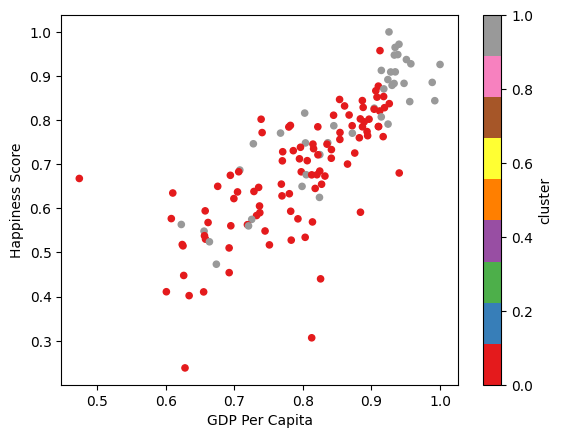

In [114]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Happiness Score',
    c="cluster",
    colormap='Set1'
)

**Q7: In the plot above, do we see clean clusters, or are points intermingled? What does this say about our clustering model in relation to the columns shown in the plot?**

*(✏️ There are points intermingled with each other. It probably means that our columns have similar effects to happiness as others columns ✏️)*

Next, using the code from **above** as a template, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `Happiness Score` and `Generosity` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='Happiness Score', ylabel='Generosity'>

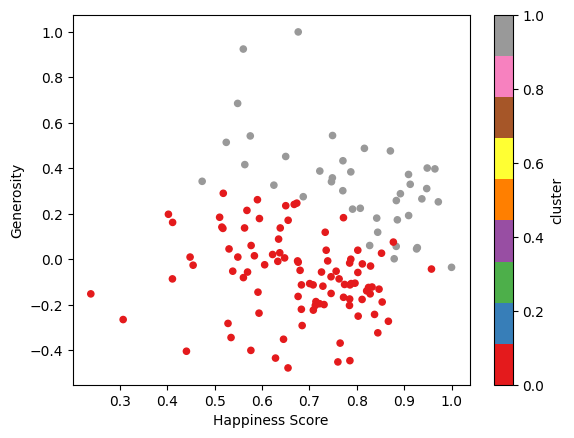

In [115]:
df2.plot.scatter(
    x='Happiness Score', 
    y='Generosity',
    c="cluster",
    colormap='Set1'
)

**Q8: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a low correlation between `Happiness Score` and `Generosity`. Does this make sense given the clusters above? Why or why not?**

*(✏️ Points aren't as intermingles as the other graph. Yes it makes sense as in the cluster you can still infer that there is a low correlation between happiness and generosity as their points aren't so intermingled. ✏️)*

Finally, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `GDP Per Capita` and `Healthy Life Expectancy` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='GDP Per Capita', ylabel='Healthy Life Expectancy'>

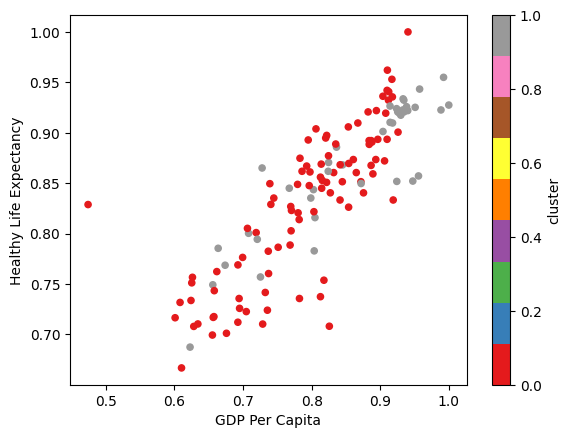

In [116]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Healthy Life Expectancy',
    c="cluster",
    colormap='Set1'
)

**Q9: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a high correlation between `GDP Per Capita` and `Healthy Life Expectancy`. Does this make sense given the clusters above? Why or why not?**

*(✏️ The points are intermingled. This makes sense as a good correlation means a visual relationship. In this graph you can see that as GDP per Capita goes up, Healthy Life Expectancy goes up as well. ✏️)*

<hr style="color: #DD3403;">

# Part 3: A Third Cluster
Our first `kmeans` model was created with only **two (2) clusters**. This is a valid start, but perhaps **more clusters** suit the dataset better. 

Let's experiment by adding **an additional cluster** and observe any differences in model results!

## Puzzle 3.1: Creating and Training our Model

In the cell below, create a new KMeans model named `kmeans_three` that contains **three (3) clusters**:


In [120]:
kmeans_three = KMeans(n_clusters=3)

Recall that KMeans models can only be fit to **numeric data**, and the data **cannot be NaN**. 

Using the `numeric_columns` and `df2`, `fit` your `kmeans_three` model:

In [123]:
model = kmeans_three.fit( df2[numeric_columns])

c:\Users\Andres Gomez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 🔬 Test Case Checkpoint 🔬

In [124]:
## == TEST CASES for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(isinstance(kmeans_three, KMeans)), "The KMeans model with three clusters should be saved as `kmeans_three`."
assert(kmeans_three.n_clusters == 3), "The `kmeans_three` model should have three clusters."
assert(kmeans_three.cluster_centers_ is not None), "The `kmeans_three` model should be trained with `df2`'s `numeric_columns`."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.2: Model Centroids

Explore the **centroids** of your `kmeans_three` model alongside the  **numeric columns** by **running the cells below**:

Remember, the **order of numbers displayed** will be the **same order** as the columns are listed in `numeric_columns`. 

In [125]:
kmeans_three.cluster_centers_

array([[ 0.73551405,  0.84505893,  0.8566764 ,  0.866435  ,  0.82127152,
        -0.16502643,  0.83935206,  0.59697069],
       [ 0.8838256 ,  0.93321898,  0.92599186,  0.91524489,  0.92464447,
         0.20935342,  0.46210083,  0.60513254],
       [ 0.59618145,  0.70985249,  0.70309257,  0.7729485 ,  0.76836629,
         0.22485876,  0.85890205,  0.60574619]])

In [126]:
numeric_columns

['Happiness Score',
 'GDP Per Capita',
 'Social Support',
 'Healthy Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

### Analysis: Centroids, Again
**Q10: Once more, answer both of these questions:**
- Looking at the centroids above, which cluster would you expect to have the **"happiest"** countries? How do you know? 
- Which **features** are arguably **most important** to defining the **centroids**? (**Hint:** Look for the largest *differences* between values from centroid to centroid)

*(✏️ I think the second cluster will have the happiest country since all of their values are high compared to the other clusters.
    It looks like corruption will be the most important to defining centroids as their differences between each cluster is great. ✏️)*

## Puzzle 3.3: Prediction, Again
Now, we are going to predict the closest cluster centroids for each of our rows (countries). Using your `kmeans_three` model and the `numeric_columns`, `predict` the centroid for each row and store that prediction in a new column in `df2` called `three_cluster`:

In [132]:
df2["three_cluster"] = kmeans_three.predict( df2[numeric_columns])
df2

,Country,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia,cluster,three_cluster
0,Finland,1.000000,0.925557,0.985758,0.920678,1.000000,-0.035782,0.195910,0.799662,1,1
1,Denmark,0.972066,0.940137,0.970498,0.921972,0.971904,0.252354,0.210980,0.705245,1,1
2,Iceland,0.964890,0.934477,1.000000,0.932324,0.973985,0.397363,0.719053,0.761421,1,1
3,Israel,0.957586,0.912436,0.959308,0.940696,0.841831,-0.043315,0.762110,0.910660,0,0
4,Netherlands,0.948616,0.938422,0.946083,0.925854,0.922997,0.401130,0.407966,0.714044,1,1
...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),0.410943,0.600943,0.663276,0.716550,0.690947,0.161959,0.897740,0.393232,2,2
133,Zimbabwe,0.410559,0.655317,0.701933,0.699405,0.680541,-0.086629,0.824543,0.306261,2,2
134,Sierra Leone,0.402101,0.634134,0.564598,0.710404,0.686785,0.197740,0.923574,0.413198,2,2
135,Lebanon,0.306509,0.812864,0.539166,0.855965,0.493236,-0.265537,0.959096,-0.037225,0,0


### 🔬 Test Case Checkpoint 🔬

In [131]:
## == TEST CASES for Puzzle 3.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
import pandas.api.types as ptypes
assert('three_cluster' in df2.columns.to_list()), "The cluster predictions for your kmeans_three model should be stored in a column `three_cluster` of `df2`."
assert(ptypes.is_numeric_dtype(df2['three_cluster'])), "The `three_cluster` column should be numeric."
assert(set(df2.three_cluster.unique()) == set([0, 1, 2])), "The `three_cluster` column should contain values of 0, 1, and 2 (representing the cluster of each row)."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.4: Visualizing Your Model, Again

Now that we've trained and predicted our `kmeans_three` model, we can visualize a **scatterplot** of our data in clusters. We specify the **parameter** `c` (color) to be the `three_cluster` of each data point, visualizing the **three clusters** in **three different colors**. 

The columns in the scatterplot that will be generated below are of `GPD Per Capita` (on the x-axis) and `Happiness Score` (on the y-axis).

Notice this code is **identical** to that from Puzzle 2.9, with the singular change of the `c` parameter passed to `scatter()`. 

*Do not modify the cell below - just **run it!***

<Axes: xlabel='GDP Per Capita', ylabel='Happiness Score'>

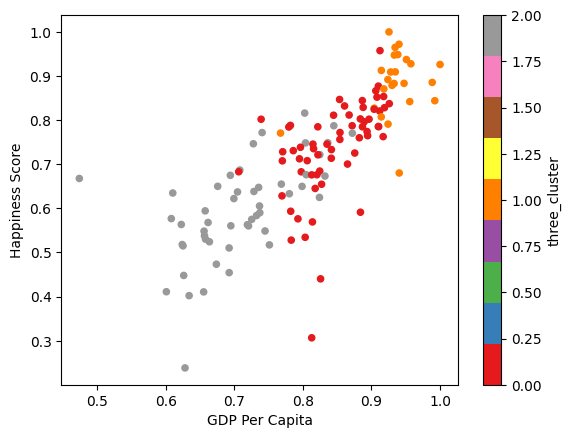

In [133]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Happiness Score',
    c="three_cluster",
    colormap='Set1'
)

**Q11: In the plot above, do we see clean clusters, or are points intermingled? What does this say about our clustering model in relation to the columns shown in the plot?**

*(✏️ It is kind of a mix of clean and intermingled and leaning more toward clean. This says that our model is pretty accurate ✏️)*

Next, again, using the code from **above** as a template, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `Happiness Score` and `Generosity` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='Happiness Score', ylabel='Generosity'>

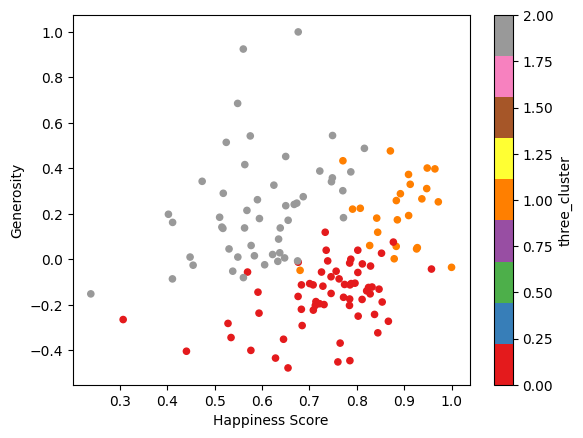

In [135]:
df2.plot.scatter(
    x='Happiness Score', 
    y='Generosity',
    c="three_cluster",
    colormap='Set1'
)

**Q12: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a low correlation between `Happiness Score` and `Generosity`. Does this make sense given the clusters above? Why or why not?**

*(✏️ We see somewhat of clean clusters. This does make sense given the cluster as you can't really say as happiness goes up so does generosity or vice versa ✏️)*

One last time, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `GDP Per Capita` and `Healthy Life Expectancy` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='GDP Per Capita', ylabel='Healthy Life Expectancy'>

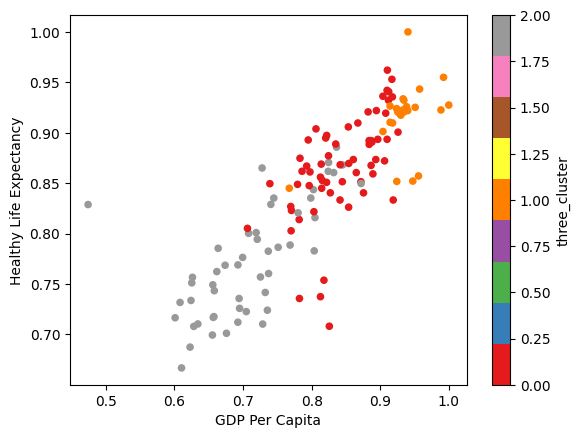

In [136]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Healthy Life Expectancy',
    c="three_cluster",
    colormap='Set1'
)

**Q13: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a high correlation between `GDP Per Capita` and `Healthy Life Expectancy`. Does this make sense given the clusters above? Why or why not?**

*(✏️ We see mainly clean cluster. This makes sense given cluster because we can say that as GDP Per Capita goes up, so does Healthy Life Expectancy ✏️)*

### Group Analysis: Comparing Models
**Q14:** Now that we've **trained and visualized** both a **two-cluster** and **three-cluster** KMeans model on the World Happiness Dataset, make some observations about the **performance of both**. Do you think one of the two models we've created **better clusters** the dataset or **reflects patterns** within it? Backup your answer with **at least three observations** from your visualizations. 



*(✏️ I think a three cluster model helped me a lot more to understand what I was looking at. With the two cluster I was confused as there was a lot of points with only two different colors. However, with the three clusters I was able to tell the relationship between the correlation value and the cluster graph. ✏️)*

*Side Note:* If you are curious, there are **numeric metrics** in the `sklearn.metrics` module that can be used to evaluate clustering models **quantitatively**. Feel free to investigate any of those metrics on your own time (**not required** for this lab). One example of such a metric is **silhouette score** - which measures how similar an object is to its own cluster versus neighboring cluster(s).

<hr style="color: #DD3403;">

# Part 4: Reflecting on Machine Learning

Q15: Consider the takeaways from both this lab and the previous (`lab_regression`). You've learned a lot about two **fundamental machine learning** techniques - **regression** and **clustering**. Given your experience, answer the following questions in a paragraph-style response:
- When would you employ **regression** rather than **clustering** and vice-versa? What are the most important *"tells"* that a dataset can have to guide your intuition? 
- Do you believe that **clustering** was particularly effective for the **World Happiness Dataset**? What takeaways do you think **regression** have provided instead? 
- How would you approach conducting Machine Learning on our **Hello Dataset**? Do you believe it is better suited for **regression** or **clustering**? Both?  



*(✏️ I would employ regression when I have the answer and want to see an answer when I don't have the data along with the standard error. I would employ clustering when I do not have the answer and want to find the answer/relationship between different variables. I think clustering was effective for this dataset. If we used regression, we could probably predict the happiness of a country given a certain amount of a variable like corruption or social support. I think I would approach the Hello Dataset with clustering as I would wanna find any type of relationship possible. I think it is suited for both but more so clustering than regression.  ✏️)*

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)